In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Load Data in a Pandas Dataframe
import seaborn as sns #just to make our visualization prettier ;-) 
import glob
import math
import matplotlib.pyplot as plt
%matplotlib inline


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "input"]).decode("utf8"))

# Geo distance
from geopy import distance

JC-201701-citibike-tripdata.csv
JC-201702-citibike-tripdata.csv
JC-201703-citibike-tripdata.csv
JC-201704-citibike-tripdata.csv
JC-201705-citibike-tripdata.csv
JC-201706-citibike-tripdata.csv
JC-201707-citibike-tripdata.csv
JC-201708 citibike-tripdata.csv
JC-201709-citibike-tripdata.csv
JC-201710-citibike-tripdata.csv
JC-201711-citibike-tripdata.csv
JC-201712-citibike-tripdata.csv
JC-201801-citibike-tripdata.csv
JC-201802-citibike-tripdata.csv
JC-201803-citibike-tripdata.csv
JC-201804-citibike-tripdata.csv
JC-201805-citibike-tripdata.csv
JC-201806-citibike-tripdata.csv
JC-201807-citibike-tripdata.csv
JC-201808-citibike-tripdata.csv
JC-201809-citibike-tripdata.csv
JC-201810-citibike-tripdata.csv
JC-201811-citibike-tripdata.csv
JC-201812-citibike-tripdata.csv



In [2]:

path = r'input' # use your path
allFiles = glob.glob(path + "/*.csv")
df = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    df.columns = ["Trip Duration", "Start Time", "Stop Time", "Start Station ID", "Start Station Name",
                  "Start Station Latitude", "Start Station Longitude", "End Station ID", "End Station Name",
                  "End Station Latitude", "End Station Longitude", "Bike ID", "User Type", "Birth Year", "Gender"]
    list_.append(df)
df = pd.concat(list_, sort=True)

print(len(df))

df.head()

648820


,Bike ID,Birth Year,End Station ID,End Station Latitude,End Station Longitude,End Station Name,Gender,Start Station ID,Start Station Latitude,Start Station Longitude,Start Station Name,Start Time,Stop Time,Trip Duration,User Type
0,24575,1983.0,3185,40.717733,-74.043845,City Hall,1,3276,40.714584,-74.042817,Marin Light Rail,2017-01-01 00:21:32,2017-01-01 00:24:01,148,Subscriber
1,24723,1978.0,3198,40.748716,-74.040443,Heights Elevator,1,3183,40.716247,-74.033459,Exchange Place,2017-01-01 00:24:35,2017-01-01 00:45:58,1283,Subscriber
2,24620,1989.0,3211,40.721525,-74.046305,Newark Ave,1,3183,40.716247,-74.033459,Exchange Place,2017-01-01 00:38:19,2017-01-01 00:44:31,372,Subscriber
3,24668,1961.0,3271,40.692640,-74.088012,Danforth Light Rail,1,3194,40.725340,-74.067622,McGinley Square,2017-01-01 00:38:37,2017-01-01 01:03:50,1513,Subscriber
4,26167,1993.0,3203,40.727596,-74.044247,Hamilton Park,1,3183,40.716247,-74.033459,Exchange Place,2017-01-01 01:47:52,2017-01-01 01:58:31,639,Subscriber


In [3]:
df.describe()

,Bike ID,Birth Year,End Station ID,End Station Latitude,End Station Longitude,Gender,Start Station ID,Start Station Latitude,Start Station Longitude,Trip Duration
count,648820.000000,629205.000000,648820.000000,648820.000000,648820.000000,648820.000000,648820.000000,648820.000000,648820.000000,6.488200e+05
mean,28928.395369,1980.184376,3240.175559,40.672868,-73.955876,1.145338,3245.513959,40.722562,-74.046010,7.035179e+02
std,2552.368943,10.229846,128.779160,1.415619,2.574023,0.504710,112.377189,0.007412,0.010650,8.820679e+03
min,14529.000000,1887.000000,79.000000,0.000000,-74.096937,0.000000,3183.000000,40.692640,-74.096937,6.100000e+01
25%,26275.000000,1974.000000,3186.000000,40.717733,-74.049968,1.000000,3187.000000,40.717733,-74.050389,2.310000e+02
50%,29445.000000,1983.000000,3203.000000,40.719586,-74.043117,1.000000,3203.000000,40.721525,-74.043845,3.390000e+02
75%,29653.000000,1988.000000,3268.000000,40.727224,-74.038051,1.000000,3269.000000,40.727224,-74.038526,5.670000e+02
max,35009.000000,2002.000000,3694.000000,40.814326,0.000000,2.000000,3694.000000,40.752559,-74.032108,2.181628e+06


In [4]:
# Remove NaN rows and incorrect values.
df.dropna(inplace= True)
#df = df[(df['Gender']!=0) & (df['End Station Latitude']!=0) & (df['End Station Latitude']!=0) ].copy()
df.loc[:,'Trip Duration'] = (df.loc[:,'Trip Duration'] / 60).apply(np.ceil)

df = df[(df['End Station Latitude']!=0) & (df['End Station Latitude']!=0)].copy()


df.describe()

,Bike ID,Birth Year,End Station ID,End Station Latitude,End Station Longitude,Gender,Start Station ID,Start Station Latitude,Start Station Longitude,Trip Duration
count,628371.000000,628371.000000,628371.000000,628371.000000,628371.000000,628371.000000,628371.000000,628371.000000,628371.000000,628371.000000
mean,28950.556176,1980.183715,3240.921304,40.722187,-74.045510,1.180995,3246.356366,40.722614,-74.046062,10.401317
std,2556.857915,10.229097,127.358361,0.007211,0.010686,0.469577,113.577591,0.007384,0.010629,54.085063
min,14529.000000,1887.000000,79.000000,40.679331,-74.096937,0.000000,3183.000000,40.692640,-74.096937,2.000000
25%,26276.000000,1974.000000,3186.000000,40.717733,-74.049968,1.000000,3187.000000,40.717733,-74.050389,4.000000
50%,29447.000000,1983.000000,3203.000000,40.719586,-74.043117,1.000000,3203.000000,40.721525,-74.043845,6.000000
75%,29655.000000,1988.000000,3268.000000,40.727224,-74.038051,1.000000,3269.000000,40.727224,-74.038526,10.000000
max,35009.000000,2002.000000,3694.000000,40.814326,-73.947821,2.000000,3694.000000,40.752559,-74.032108,5785.000000


In [5]:
df['Birth Year'] = df['Birth Year'].astype('int')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628371 entries, 0 to 32059
Data columns (total 15 columns):
Bike ID                    628371 non-null int64
Birth Year                 628371 non-null int64
End Station ID             628371 non-null int64
End Station Latitude       628371 non-null float64
End Station Longitude      628371 non-null float64
End Station Name           628371 non-null object
Gender                     628371 non-null int64
Start Station ID           628371 non-null int64
Start Station Latitude     628371 non-null float64
Start Station Longitude    628371 non-null float64
Start Station Name         628371 non-null object
Start Time                 628371 non-null object
Stop Time                  628371 non-null object
Trip Duration              628371 non-null float64
User Type                  628371 non-null object
dtypes: float64(5), int64(5), object(5)
memory usage: 76.7+ MB


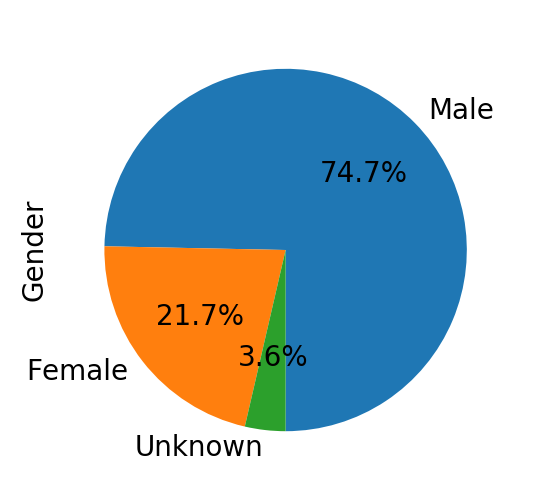

In [6]:
fig = plt.figure(figsize=(3,3), dpi=200)
ax = plt.subplot(111)
df['Gender'].value_counts().rename({0: 'Unknown', 1: 'Male', 2:'Female'}).plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=270, fontsize=10)

In [7]:
# New data frame copy
ndf = df.copy()

ndf['Start Date'] = pd.to_datetime(ndf['Start Time'])
ndf['Stop Date'] = pd.to_datetime(ndf['Stop Time'])

In [8]:
#ndf['Start Day'] = ndf['Start Time'].dt.day
ndf['Start hour'] = ndf['Start Date'].dt.hour
ndf['Start weekday'] = ndf['Start Date'].dt.weekday + 1
ndf['Start month'] = ndf['Start Date'].dt.month
ndf['Start weekday_name'] = ndf['Start Date'].dt.weekday_name
ndf['Start season'] = ndf['Start Date'].dt.quarter

#ndf['Stop Day'] = ndf['Start Time'].dt.day
ndf['Stop hour'] = ndf['Stop Date'].dt.hour
ndf['Stop weekday'] = ndf['Stop Date'].dt.weekday + 1
ndf['Stop month'] = ndf['Stop Date'].dt.month
ndf['Stop weekday_name'] = ndf['Stop Date'].dt.weekday_name
ndf['Stop season'] = ndf['Stop Date'].dt.quarter


def calculate_distance(row):
    return distance.distance( (row['Start Station Latitude'], row['Start Station Longitude']), (row['End Station Latitude'], row['End Station Longitude'] ) ).km

ndf['Distance'] = ndf.apply(calculate_distance, axis=1)

ndf.head()

,Bike ID,Birth Year,End Station ID,End Station Latitude,End Station Longitude,End Station Name,Gender,Start Station ID,Start Station Latitude,Start Station Longitude,...,Start weekday,Start month,Start weekday_name,Start season,Stop hour,Stop weekday,Stop month,Stop weekday_name,Stop season,Distance
0,24575,1983,3185,40.717733,-74.043845,City Hall,1,3276,40.714584,-74.042817,...,7,1,Sunday,1,0,7,1,Sunday,1,0.360259
1,24723,1978,3198,40.748716,-74.040443,Heights Elevator,1,3183,40.716247,-74.033459,...,7,1,Sunday,1,0,7,1,Sunday,1,3.653601
2,24620,1989,3211,40.721525,-74.046305,Newark Ave,1,3183,40.716247,-74.033459,...,7,1,Sunday,1,0,7,1,Sunday,1,1.233517
3,24668,1961,3271,40.692640,-74.088012,Danforth Light Rail,1,3194,40.725340,-74.067622,...,7,1,Sunday,1,1,7,1,Sunday,1,4.019336
4,26167,1993,3203,40.727596,-74.044247,Hamilton Park,1,3183,40.716247,-74.033459,...,7,1,Sunday,1,1,7,1,Sunday,1,1.555370


In [9]:
ndf.describe()

,Bike ID,Birth Year,End Station ID,End Station Latitude,End Station Longitude,Gender,Start Station ID,Start Station Latitude,Start Station Longitude,Trip Duration,Start hour,Start weekday,Start month,Start season,Stop hour,Stop weekday,Stop month,Stop season,Distance
count,628371.000000,628371.000000,628371.000000,628371.000000,628371.000000,628371.000000,628371.000000,628371.000000,628371.000000,628371.000000,628371.000000,628371.000000,628371.000000,628371.000000,628371.000000,628371.000000,628371.000000,628371.000000,628371.000000
mean,28950.556176,1980.183715,3240.921304,40.722187,-74.045510,1.180995,3246.356366,40.722614,-74.046062,10.401317,13.589886,3.729929,7.121743,2.711849,13.697491,3.729835,7.121818,2.711877,0.995636
std,2556.857915,10.229097,127.358361,0.007211,0.010686,0.469577,113.577591,0.007384,0.010629,54.085063,5.167124,1.895436,2.933837,0.980126,5.190418,1.895853,2.933828,0.980120,0.666446
min,14529.000000,1887.000000,79.000000,40.679331,-74.096937,0.000000,3183.000000,40.692640,-74.096937,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,26276.000000,1974.000000,3186.000000,40.717733,-74.049968,1.000000,3187.000000,40.717733,-74.050389,4.000000,9.000000,2.000000,5.000000,2.000000,9.000000,2.000000,5.000000,2.000000,0.603326
50%,29447.000000,1983.000000,3203.000000,40.719586,-74.043117,1.000000,3203.000000,40.721525,-74.043845,6.000000,14.000000,4.000000,7.000000,3.000000,14.000000,4.000000,7.000000,3.000000,0.830572
75%,29655.000000,1988.000000,3268.000000,40.727224,-74.038051,1.000000,3269.000000,40.727224,-74.038526,10.000000,18.000000,5.000000,9.000000,3.000000,18.000000,5.000000,9.000000,3.000000,1.254715
max,35009.000000,2002.000000,3694.000000,40.814326,-73.947821,2.000000,3694.000000,40.752559,-74.032108,5785.000000,23.000000,7.000000,12.000000,4.000000,23.000000,7.000000,12.000000,4.000000,12.592176


In [10]:
from pandas.tseries.holiday import USFederalHolidayCalendar


cal = USFederalHolidayCalendar()
holidays = cal.holidays(start=ndf['Start Date'].min(), end=ndf['Start Date'].max())
print('From {} until {}'.format(ndf['Start Date'].min(), ndf['Start Date'].max()))

ndf['Holiday'] = ndf['Start Date'].dt.normalize().isin(holidays) | (ndf['Start weekday'] == 7)

print(len(ndf[ndf['Holiday']==True]), 'trips done during holidays' )

From 2017-01-01 00:21:32 until 2018-12-31 23:25:49.609000
74916 trips done during holidays


In [11]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628371 entries, 0 to 32059
Data columns (total 29 columns):
Bike ID                    628371 non-null int64
Birth Year                 628371 non-null int64
End Station ID             628371 non-null int64
End Station Latitude       628371 non-null float64
End Station Longitude      628371 non-null float64
End Station Name           628371 non-null object
Gender                     628371 non-null int64
Start Station ID           628371 non-null int64
Start Station Latitude     628371 non-null float64
Start Station Longitude    628371 non-null float64
Start Station Name         628371 non-null object
Start Time                 628371 non-null object
Stop Time                  628371 non-null object
Trip Duration              628371 non-null float64
User Type                  628371 non-null object
Start Date                 628371 non-null datetime64[ns]
Stop Date                  628371 non-null datetime64[ns]
Start hour              

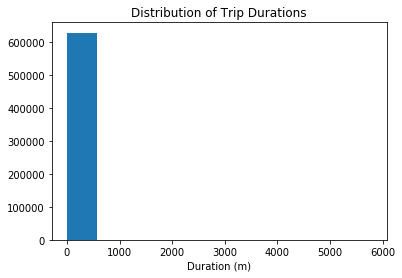

In [12]:
plt.hist(ndf.loc[:,'Trip Duration'])
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (m)')
plt.show()


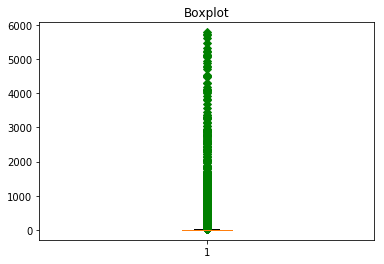

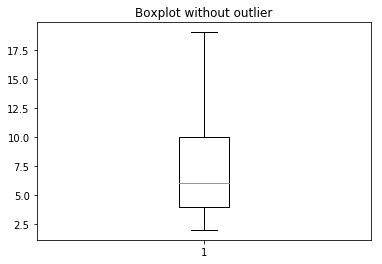

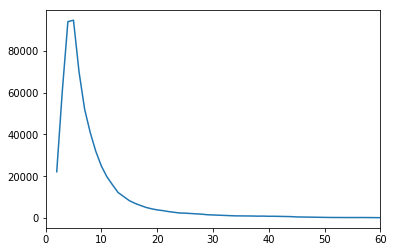

2.0     22142
3.0     60870
4.0     94111
5.0     94786
6.0     69944
7.0     52092
8.0     40968
9.0     31939
10.0    24881
11.0    19680
Name: Trip Duration, dtype: int64
22778


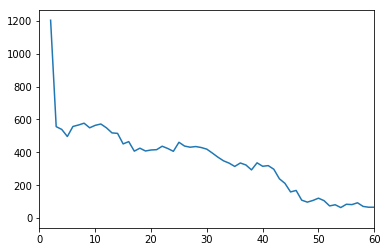

2.0     1203
3.0      556
4.0      539
5.0      496
6.0      557
7.0      566
8.0      577
9.0      549
10.0     564
11.0     572
Name: Trip Duration, dtype: int64


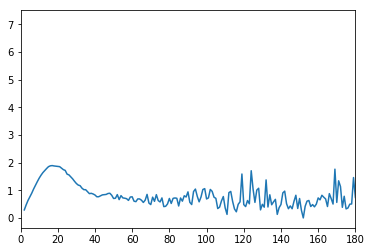

In [13]:
plt.boxplot(list(ndf.loc[:, 'Trip Duration']), 0, 'gD')
plt.title('Boxplot')
plt.show()

plt.boxplot(list(ndf.loc[:, 'Trip Duration']), 0, '')
plt.title('Boxplot without outlier')
plt.show()

f1 = ndf['Trip Duration'].value_counts()
f1 = f1.sort_index()

plt.plot(f1.index, f1)
plt.xlim(0, 60)
plt.show()

print(f1.head(10))

tmp = ndf[(ndf['Start Station ID']) == (ndf['End Station ID'])]
print(len(tmp))

f2 = tmp['Trip Duration'].value_counts().sort_index()
plt.plot(f2.index, f2)
plt.xlim(0, 60)
plt.show()
print(f2.head(10))

avg_time = ndf.groupby('Trip Duration')['Distance'].mean()

plt.plot(avg_time.index, avg_time)
plt.xlim(0,180)
plt.show()


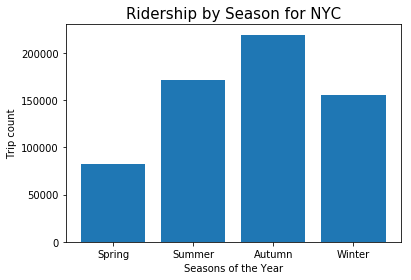

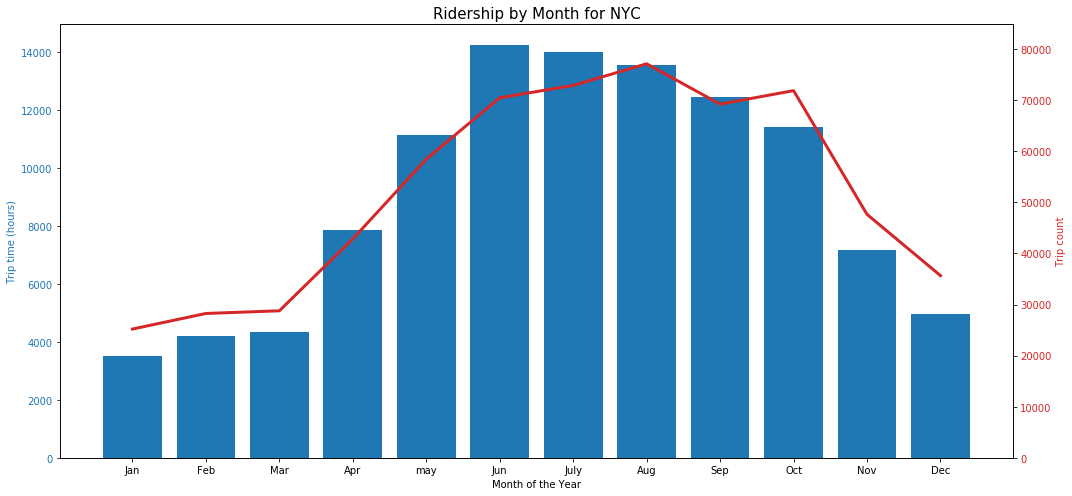

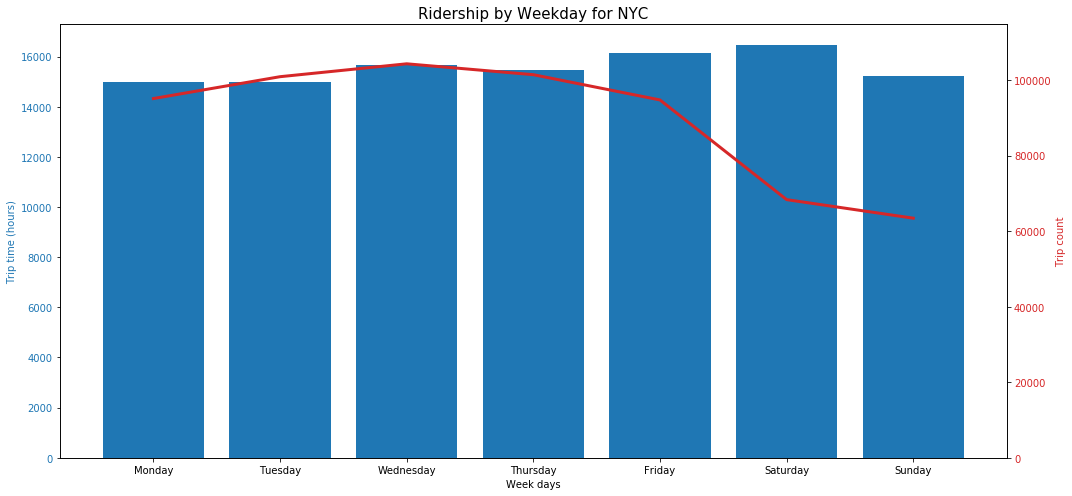

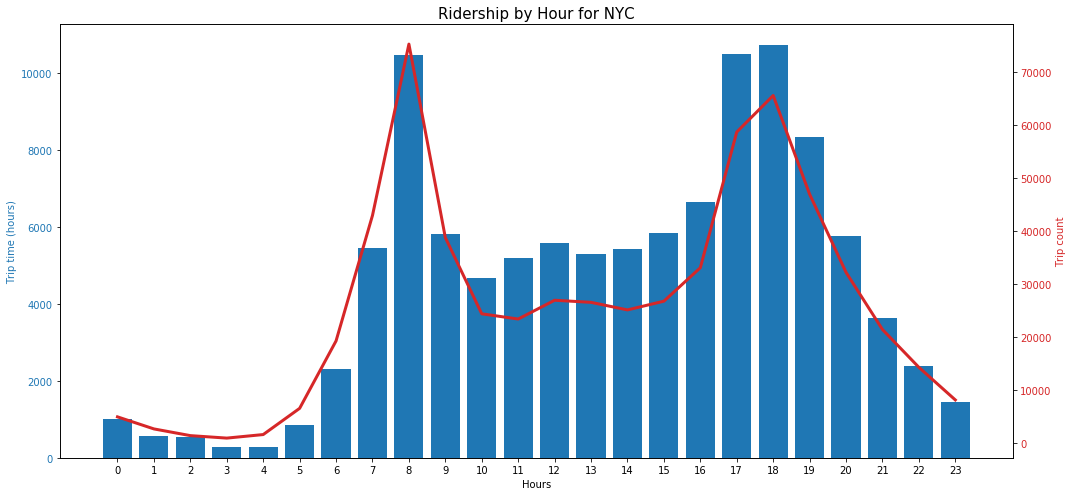

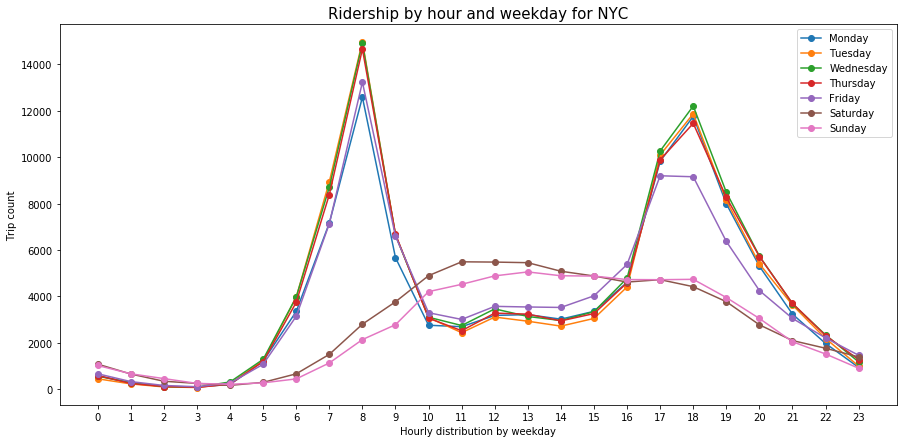

In [37]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


#Seasonly distribution
bins = list(range(1,5,1))

plt.bar(bins, ndf['Start season'].value_counts().sort_index())
plt.xticks(bins, ['Spring', 'Summer', 'Autumn', 'Winter'])
plt.xlabel('Seasons of the Year')
plt.ylabel('Trip count')
plt.title('Ridership by Season for NYC', fontsize=15)
plt.show()


# Monthly distribution

bins = list(range(1,13,1))
trip_duration = ndf.groupby('Start month')['Trip Duration'].sum()

fig, ax1 = plt.subplots(figsize=(15,7))

color = 'tab:blue'
ax1.set_xlabel('Month of the Year')
ax1.set_ylabel('Trip time (hours)', color=color)
ax1.bar(bins, trip_duration/60, color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.setp(ax1, xticks=bins, xticklabels=['Jan','Feb','Mar','Apr','may','Jun','July','Aug','Sep','Oct','Nov','Dec'])
ax1.set_title("Ridership by Month for NYC", fontsize=15)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Trip count', color=color)  # we already handled the x-label with ax1
ax2.plot(bins, ndf['Start month'].value_counts().sort_index(), color=color, linewidth=3)
ax2.set_ylim([0, max(ndf['Start month'].value_counts())*1.1])
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# Weekly distribution

bins = list(range(1, 8, 1))
trip_duration = ndf.groupby('Start weekday')['Trip Duration'].sum()

fig, ax1 = plt.subplots(figsize=(15,7))

color = 'tab:blue'
ax1.set_xlabel('Week days')
ax1.set_ylabel('Trip time (hours)', color=color)
ax1.bar(bins, trip_duration/60, color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.setp(ax1, xticks=bins, xticklabels=weekdays)
ax1.set_title("Ridership by Weekday for NYC", fontsize=15)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Trip count', color=color)  # we already handled the x-label with ax1
ax2.set_ylim([0, max(ndf['Start weekday'].value_counts())*1.1])
ax2.plot(bins, ndf['Start weekday'].value_counts().sort_index(), color=color, linewidth=3)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# Hourly distribution

bins = list(range(24))
trip_duration = ndf.groupby('Start hour')['Trip Duration'].sum()

fig, ax1 = plt.subplots(figsize=(15,7))

color = 'tab:blue'
ax1.set_xlabel('Hours')
ax1.set_ylabel('Trip time (hours)', color=color)
ax1.bar(bins, trip_duration/60, color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.setp(ax1, xticks=bins)
ax1.set_title("Ridership by Hour for NYC", fontsize=15)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Trip count', color=color)  # we already handled the x-label with ax1
ax2.plot(bins, ndf['Start hour'].value_counts().sort_index(), color=color, linewidth=3)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


# Weekday x Hour distribution

tmp = ndf.groupby(['Start weekday', 'Start hour'],sort=True).size().reset_index(name='counts')

bins = list(range(24))
plt.figure(figsize=(15,7))
plt.xlabel('Hourly distribution by weekday')
plt.ylabel('Trip count')
plt.title('Ridership by hour and weekday for NYC', fontsize=15)
plt.xticks(bins)
for i in range(1,8,1):
    plt.plot(bins, tmp[tmp['Start weekday'] == i]['counts'], linestyle='-', marker='o', label=weekdays[i-1])
plt.legend()
plt.show()



In [15]:
# Pruning

#ndf.drop( ndf[(ndf['Trip Duration'] > 180) | (ndf['Trip Duration'] <= 2)].index, inplace=True)



In [16]:
data = ndf[['End Station ID', 'Start Station ID', 'Trip Duration', 'Start hour',
              'Start weekday', 'Start quarter', 'Holiday']].copy()

data.head()

#data.loc[:,'Holiday'] = (data['Start weekday'] == 6) | data['Holiday']
#data.head()
data.loc[:,'End Station ID'] = data.loc[:,'End Station ID'].astype('category')
data.loc[:,'Start Station ID'] = data.loc[:,'Start Station ID'].astype('category')
data.loc[:,'Start weekday'] = data.loc[:,'Start weekday'].astype('category')
data.loc[:,'Start quarter'] = data.loc[:,'Start quarter'].astype('category')


KeyError: "['Start quarter'] not in index"

In [ ]:
data.info()
data.describe()

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data = data.apply(le.fit_transform)
data.head()

In [ ]:
X = data.iloc[:-10000,1:]
test_X = data.iloc[-10000:,1:]
print(len(X), len(test_X))

y = data.iloc[:-10000,:1]
test_y = data.iloc[-10000:,:1]
print(len(y),len(test_y))